### Machine Learning Models

In [24]:
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

In [5]:
data['flag'].replace('Yes', 1, inplace = True)
data['flag'].replace('No', 0, inplace = True)

fam_income_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12}
data['fam_income'].replace(fam_income_mapping, inplace=True)

mortgage_mapping = {'1Low': 1, '2Med': 2, '3High': 3}
data['mortgage'].replace(mortgage_mapping, inplace=True)

data_encoded = pd.get_dummies(data, drop_first=True)

data_encoded.columns = data_encoded.columns.str.replace(' ', '_')

X = data_encoded.drop('flag', axis=1)
y = data_encoded['flag']

Choose the best model with **Lazy Predict**

In [27]:
import lazypredict

from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=404)

In [29]:
clflazy = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clflazy.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [41:05<00:39, 39.07s/it]   

[LightGBM] [Info] Number of positive: 15987, number of negative: 16013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499594 -> initscore=-0.001625
[LightGBM] [Info] Start training from score -0.001625


100%|██████████| 29/29 [41:06<00:00, 85.04s/it]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.68               0.68     0.68      0.68   
LGBMClassifier                     0.68               0.68     0.68      0.68   
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68   
RidgeClassifierCV                  0.68               0.68     0.68      0.68   
RidgeClassifier                    0.68               0.68     0.68      0.68   
LinearSVC                          0.68               0.68     0.68      0.68   
CalibratedClassifierCV             0.68               0.68     0.68      0.68   
AdaBoostClassifier                 0.68               0.67     0.67      0.67   
SVC                                0.67               0.67     0.67      0.67   
XGBClassifier                      0.67               0.67     0.67      0.67   
SGDClassifier               

### RANDOM FOREST

In [30]:
randomforest = RandomForestClassifier(random_state = 12, oob_score=True)

y_pred_1 = randomforest.fit(X_train, y_train).predict(X_test)
report_1 = classification_report(y_test, y_pred_1)
print("Performance Metrics Before Hyperparameter Tuning:")
print(report_1)


Performance Metrics Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3987
           1       0.65      0.65      0.65      4013

    accuracy                           0.65      8000
   macro avg       0.65      0.65      0.65      8000
weighted avg       0.65      0.65      0.65      8000



**k-fold cross-validation**

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(randomforest, X, y, cv=10)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.65075 0.6545  0.64875 0.64675 0.6335  0.646   0.65125 0.6645  0.63925
 0.64775]
Average Score: 0.6483
Standard Deviation: 0.00790395470634796


**Hyperparameter tunning**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler


pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('randomforest', RandomForestClassifier())
])


param_grid = {
    'randomforest__n_estimators': [25, 50, 100],
    'randomforest__max_depth': [2, 5, 10],
    'randomforest__min_samples_split': [2, 4, 6],
    'randomforest__min_samples_leaf': [2, 4, 6]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_


Mejores hiperparámetros: {'randomforest__max_depth': 5, 'randomforest__min_samples_leaf': 6, 'randomforest__min_samples_split': 2, 'randomforest__n_estimators': 100}


In [35]:

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=6,
    random_state=78
)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
report2 = classification_report(y_test, y_pred_rf)
print("\nPerformance Metrics After Hyperparameter Tuning:")
print(report2)


Performance Metrics After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      3987
           1       0.68      0.68      0.68      4013

    accuracy                           0.68      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.68      0.68      0.68      8000



**k-fold Cross-validation after hyperparameter**

In [36]:
scores = cross_val_score(random_forest, X, y, cv=10)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.68775 0.6865  0.69375 0.682   0.67525 0.685   0.68625 0.68375 0.67175
 0.67925]
Average Score: 0.683125
Standard Deviation: 0.006058310408026317


### SUPPORT VECTOR MACHINE

**Features Selection**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


X_sub, _, y_sub, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)


X_train_sub_scaled = scaler.fit_transform(X_sub)
X_sub_scaled = scaler.transform(X_sub)

clf = svm.SVC(kernel="linear")

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X_sub_scaled, y_sub)


print("Optimal number of features: %d" % rfecv.n_features_)


print('Selected features:', rfecv.support_)

Optimal number of features: 26
Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

clf = svm.SVC()

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Default hyperparameter values:")
print(clf.get_params())

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Default hyperparameter values:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[[2643 1344]
 [1261 2752]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3987
           1       0.67      0.69      0.68      4013

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000



**k-fold cross-validation**

In [ ]:
scores1 = cross_val_score(clf, X_scaled, y, cv=10)

print("Cross-Validation Scores:", scores1)
print("Average Score:", scores1.mean())
print("Standard Deviation:", scores1.std())

Cross-Validation Scores: [0.67725 0.69025 0.6855  0.679   0.66975 0.685   0.68625 0.67825 0.6725
 0.67475]
Average Score: 0.6798500000000001
Standard Deviation: 0.00632178772183947


**hyperparameter tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': [ 'linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.01,  1, 5, 10],
    'gamma': [0.1, 0.01,'auto', 'scale']
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test_scaled, y_test)
print("Precisión del mejor modelo en el conjunto de prueba:", accuracy)

Mejores hiperparámetros encontrados:
{'C': 0.01, 'kernel': 'linear'}
Precisión del mejor modelo en el conjunto de prueba: 0.678


In [ ]:
best_kernel = 'linear'
best_C = 0.01


best_svc = SVC(kernel=best_kernel, C=best_C, random_state=404, probability=True)

best_svc.fit(X_train_scaled, y_train)

y_pred_4 = best_svc.predict(X_test_scaled)

print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      3987
           1       0.68      0.67      0.68      4013

    accuracy                           0.68      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.68      0.68      0.68      8000



**k-fold cross-validation**

In [ ]:
scores12 = cross_val_score(best_svc, X_scaled, y, cv=10)

print("Cross-Validation Scores:", scores12)
print("Average Score:", scores12.mean())
print("Standard Deviation:", scores12.std())

Cross-Validation Scores: [0.67725 0.69025 0.6855  0.679   0.66975 0.685   0.68625 0.67825 0.6725
 0.67475]
Average Score: 0.6798500000000001
Standard Deviation: 0.00632178772183947


### Models Comparison

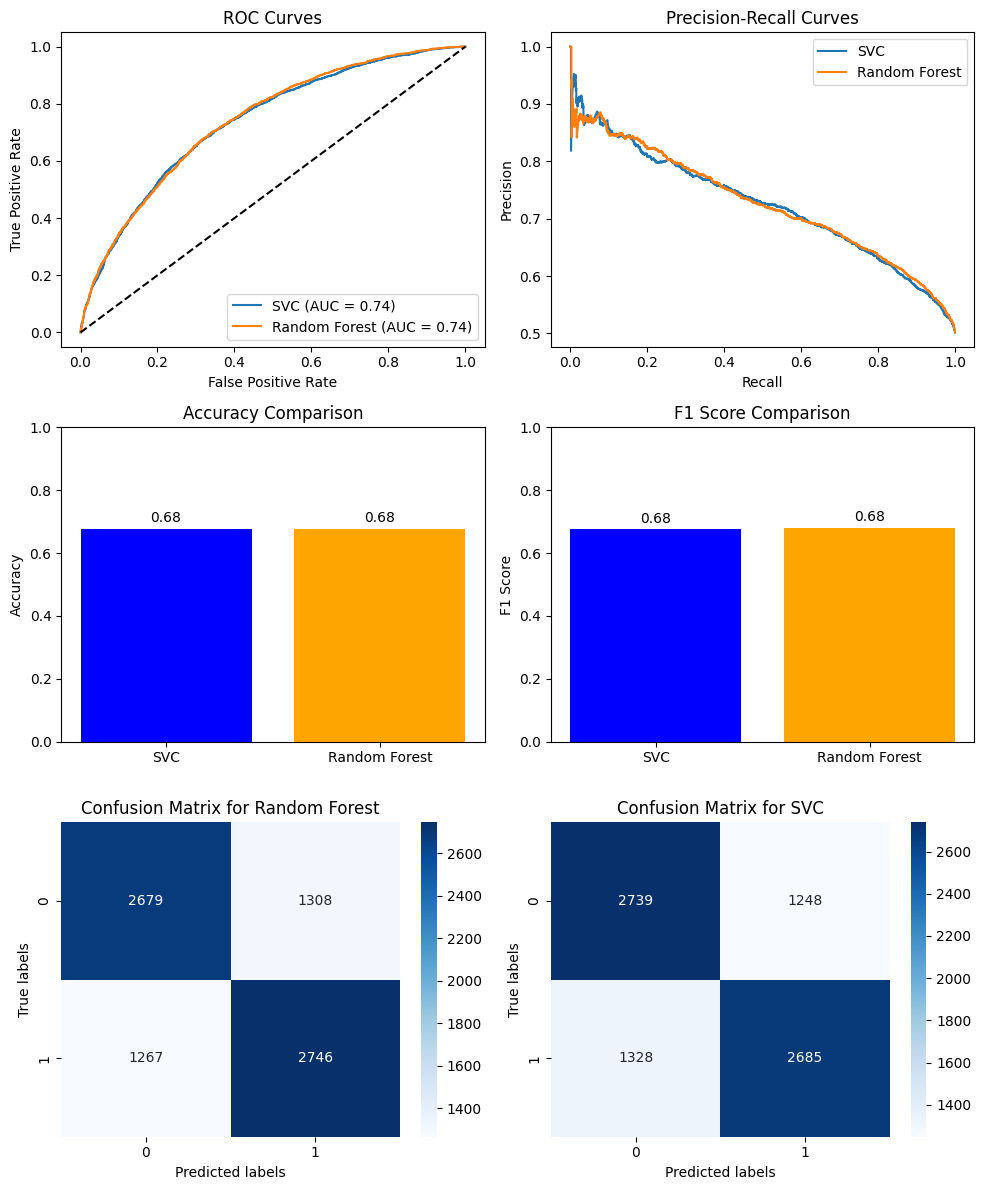

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, f1_score

y_proba_svc = best_svc.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = random_forest.predict_proba(X_test)[:, 1]

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Precision-Recall
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_proba_svc)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

# Accuracy y F1 Score
accuracy_svc = accuracy_score(y_test, y_pred_4)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_svc = f1_score(y_test, y_pred_4)
f1_rf = f1_score(y_test, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svc = confusion_matrix(y_test, y_pred_4)


models = ['SVC', 'Random Forest']
accuracies = [accuracy_svc, accuracy_rf]
f1_scores = [f1_svc, f1_rf]

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

#  ROC
axs[0, 0].plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc(fpr_svc, tpr_svc):.2f})')
axs[0, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
axs[0, 0].plot([0, 1], [0, 1], 'k--', label='')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curves')
axs[0, 0].legend()

#  Precision-Recall
axs[0, 1].plot(recall_svc, precision_svc, label='SVC')
axs[0, 1].plot(recall_rf, precision_rf, label='Random Forest')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curves')
axs[0, 1].legend()

# Gráfico de barras de Accuracy
axs[1, 0].bar(models, accuracies, color=['blue', 'orange'])
axs[1, 0].set_title('Accuracy Comparison')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].set_ylim([0, 1])
for i, acc in enumerate(accuracies):
    axs[1, 0].text(i, acc + 0.02, f'{acc:.2f}', ha='center')

# F1 Score
axs[1, 1].bar(models, f1_scores, color=['blue', 'orange'])
axs[1, 1].set_title('F1 Score Comparison')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_ylim([0, 1])
for i, f1 in enumerate(f1_scores):
    axs[1, 1].text(i, f1 + 0.02, f'{f1:.2f}', ha='center')

# Confuision matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', ax=axs[2, 0])
axs[2, 0].set_title('Confusion Matrix for Random Forest')
axs[2, 0].set_xlabel('Predicted labels')
axs[2, 0].set_ylabel('True labels')

# Confuision matrix
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap='Blues', ax=axs[2, 1])
axs[2, 1].set_title('Confusion Matrix for SVC')
axs[2, 1].set_xlabel('Predicted labels')
axs[2, 1].set_ylabel('True labels')

plt.tight_layout()
plt.show()


**Features importance Random Forest**

house_val                           0.232592
mortgage                            0.075825
fam_income                          0.114085
gender_Male                         0.097008
education_College                   0.016933
education_Graduate                  0.020443
education_High_School               0.033331
education_Lower_than_High_School    0.026752
age_Adult_II_(45,55]                0.017695
age_Retired_(more_than_65)          0.019930
age_Senior_(55,65]                  0.012212
age_Young_(0,25]                    0.021268
age_Young_Adult_(25,35]             0.015318
online_Yes                          0.087639
marriage_Single                     0.013146
child_Yes                           0.021672
occupation_Farm                     0.000998
occupation_Others                   0.006302
occupation_Professional             0.072049
occupation_Retired                  0.012718
occupation_Sales/Service            0.014915
house_owner_Renter                  0.016663
region_Nor

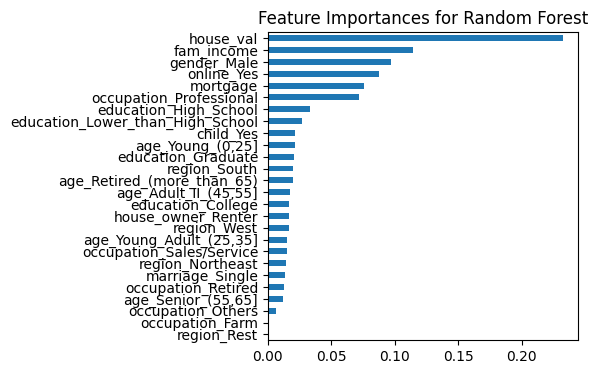

In [ ]:
importances = pd.Series(random_forest.feature_importances_, index=X.columns)

print(importances)

importances_sorted = importances.sort_values()

plt.figure(figsize=(4, 4))
importances_sorted.plot(kind='barh')
plt.title('Feature Importances for Random Forest')
plt.show()


**Features importance SVM**

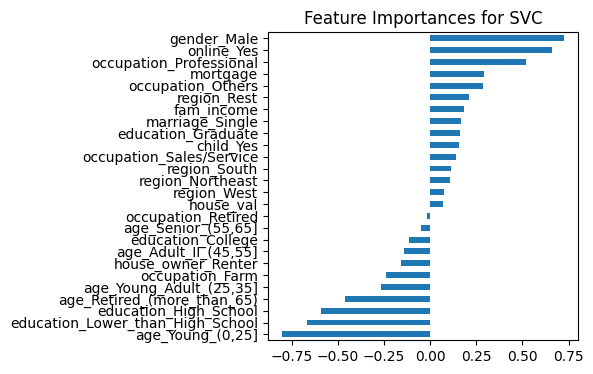

house_val                           0.069974
mortgage                            0.290060
fam_income                          0.184775
gender_Male                         0.724078
education_College                  -0.114918
education_Graduate                  0.163823
education_High_School              -0.591627
education_Lower_than_High_School   -0.666266
age_Adult_II_(45,55]               -0.142890
age_Retired_(more_than_65)         -0.458680
age_Senior_(55,65]                 -0.051681
age_Young_(0,25]                   -0.803114
age_Young_Adult_(25,35]            -0.267106
online_Yes                          0.660760
marriage_Single                     0.167560
child_Yes                           0.156378
occupation_Farm                    -0.240000
occupation_Others                   0.287632
occupation_Professional             0.519884
occupation_Retired                 -0.015378
occupation_Sales/Service            0.142117
house_owner_Renter                 -0.155640
region_Nor

In [ ]:
column_names = X.columns  


importances2 = pd.Series(best_svc.coef_[0], index=column_names)
importances2_sorted = importances2.sort_values()

plt.figure(figsize=(4, 4))
importances2_sorted.plot(kind='barh')
plt.title('Feature Importances for SVC')
plt.show()

print(importances2)


### Neural Network ##

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
1000/1000 [==============================] - 4s 3ms/step - loss: 0.6329 - accuracy: 0.6444 - val_loss: 0.6041 - val_accuracy: 0.6712
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6109 - accuracy: 0.6732 - val_loss: 0.5988 - val_accuracy: 0.6762
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6066 - accuracy: 0.6771 - val_loss: 0.6023 - val_accuracy: 0.6800
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6049 - accuracy: 0.6774 - val_loss: 0.5998 - val_accuracy: 0.6812
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6032 - accuracy: 0.6796 - val_loss: 0.5969 - val_accuracy: 0.6815
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6008 - accuracy: 0.6783 - val_loss: 0.5971 - val_accuracy: 0.6815
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5993 - accuracy: 0.6823 - val_loss: 0.5967 - val_accuracy:

**Hyperparameter tunning**

In [ ]:
import kerastuner as kt

def build_model(hp):
    model = Sequential([
        Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='hola',
                     overwrite=True)


In [ ]:
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Trial 30 Complete [00h 02m 23s]
val_accuracy: 0.6853749752044678

Best val_accuracy So Far: 0.6853749752044678
Total elapsed time: 00h 15m 30s
